In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

#Mount Google Drive
drive.mount('/content/drive')

#loading dataset
file_path= '/content/drive/MyDrive/Github/googleplaystore/googleplaystore.csv'
data= pd.read_csv(file_path)


Mounted at /content/drive


In [ ]:
#display first 5 rows of the Dataset
data.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#Check last row of dataset
data.tail(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
#check for missing values in each column
data.isna().sum()

,0
App,0
Category,1
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,0
Genres,1


In [ ]:
#drop 'Category' rows containing NaN Values
data.dropna(subset=['Category'], inplace=True)
#drop 'Rating' rows containing NaN Values
data.dropna(subset=['Rating'], inplace=True)
#drop 'Type' rows containing NaN Values
data.dropna(subset=['Type'], inplace=True)
#drop 'Genres' rows containing NaN Values
data.dropna(subset=['Genres'], inplace=True)
#drop 'Current Ver' rows containing NaN Values
data.dropna(subset=['Current Ver'], inplace=True)
#drop 'Android Ver' rows containing NaN Values
data.dropna(subset=['Android Ver'], inplace=True)

In [ ]:
#Checking if there are any missing values left
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   object 
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.0+ MB


In [ ]:
data['Last Updated'] = pd.to_datetime(data['Last Updated'], errors = 'coerce')

In [ ]:
#final check for missing values
data.isna().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [ ]:
#Show category with highest rating
category_with_highest_rating = data.groupby('Category')['Rating'].mean()
highest_category = category_with_highest_rating.idxmax()
highest_rating = category_with_highest_rating.max()
print(f"Category: {highest_category}, Rating: {highest_rating}")


Category: EVENTS, Rating: 4.435555555555555


In [ ]:
#Total number of Apps having 5-star-rating
five_star_apps = data[data['Rating'] == 5.0]['App'].count()
print(f"Total number of apps with a 5-star rating: {five_star_apps}")

Total number of apps with a 5-star rating: 274


In [ ]:
#Total number of free and paid apps
free_paid_counts= data['Type'].value_counts()
print(free_paid_counts)

Type
Free    8715
Paid     645
Name: count, dtype: int64


In [ ]:
#App with maximum review
max_reviews_app = data.loc[data['Reviews'].idxmax()]['App']
max_reviews_count = data['Reviews'].max()
print(f"The app with the maximum number of reviews is: {max_reviews_app}")
print(f"Number of reviews: {max_reviews_count}")

The app with the maximum number of reviews is: Facebook
Number of reviews: 78158306


In [ ]:
#Display 5 Apps with Highest Reviews
top_5_apps = data.nlargest(5, 'Reviews')
print(top_5_apps[['App', 'Reviews']])

                     App   Reviews
2544            Facebook  78158306
3943            Facebook  78128208
336   WhatsApp Messenger  69119316
381   WhatsApp Messenger  69119316
3904  WhatsApp Messenger  69109672


In [ ]:
#Average Rating for Free and Paid Apps
average_rating_free = data[data['Type'] == 'Free']['Rating'].mean()
average_rating_paid = data[data['Type'] == 'Paid']['Rating'].mean()
print(f"Average Rating for Free Apps: {average_rating_free:.2f}")
print(f"Average Rating for Paid Apps: {average_rating_paid:.2f}")

Average Rating for Free Apps: 4.1862880091795756
Average Rating for Paid Apps: 4.27


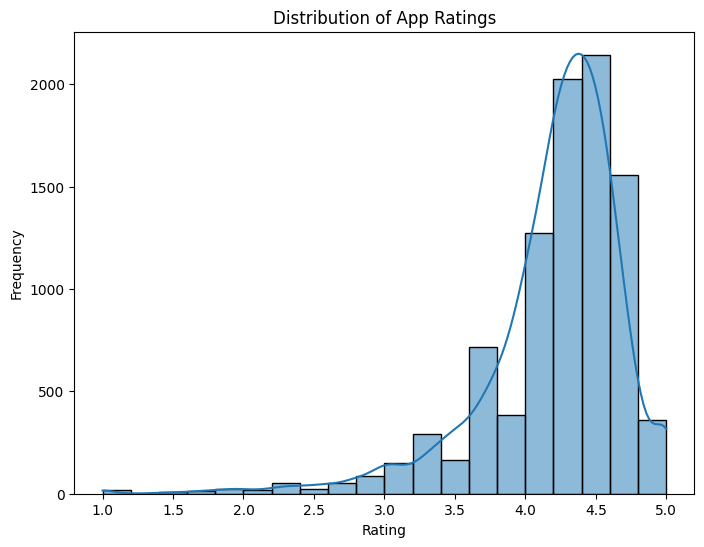

In [ ]:
#Distribution of Apps Rating
plt.figure(figsize=(8, 6))
sns.histplot(data['Rating'], bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Average Rating')

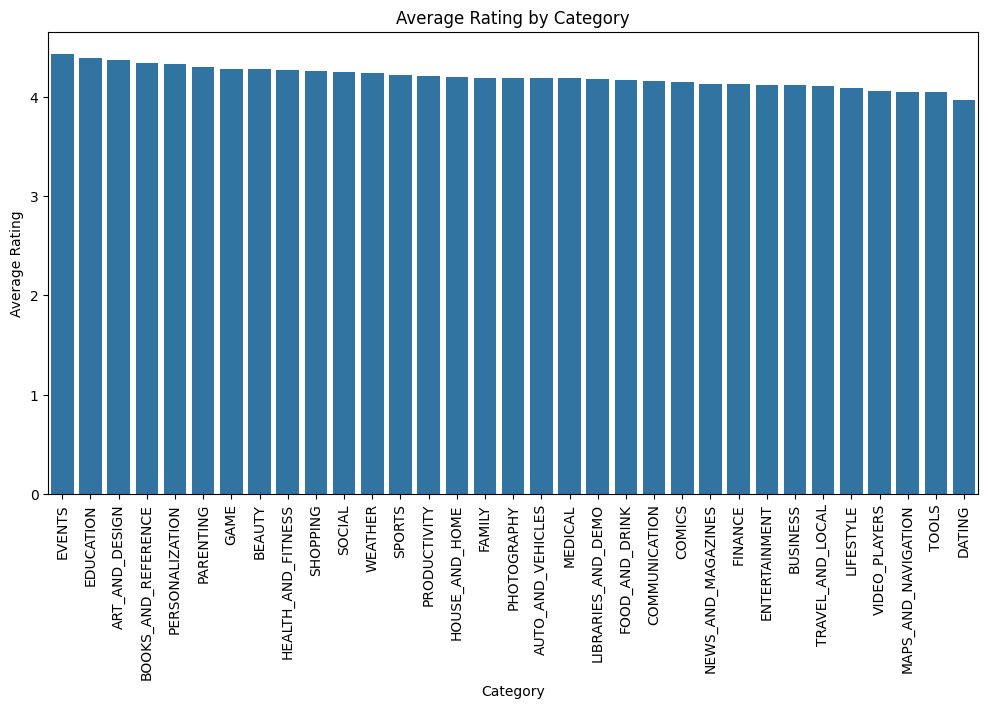

In [ ]:
#Average rating by category
plt.figure(figsize=(12, 6))
category_ratings = data.groupby('Category')['Rating'].mean().sort_values(ascending=False)
sns.barplot(x=category_ratings.index, y=category_ratings.values)
y= category_ratings.values
plt.xticks(rotation=90)
plt.title('Average Rating by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')

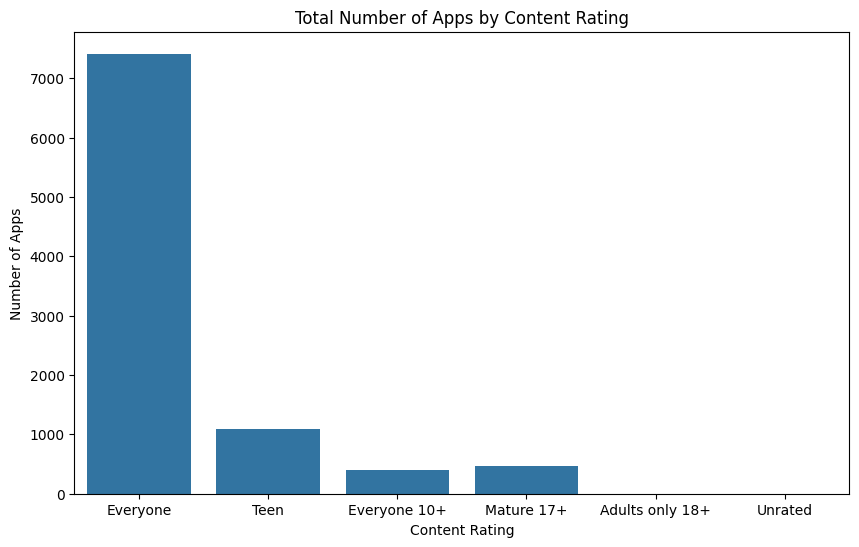

In [ ]:
#Total Number of Apps by Content Rating
plt.figure(figsize=(10, 6))
sns.countplot(x='Content Rating', data=data)
plt.title('Total Number of Apps by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Number of Apps')
plt.show()